In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
X, y = make_moons(100, noise=0.25,random_state=2)

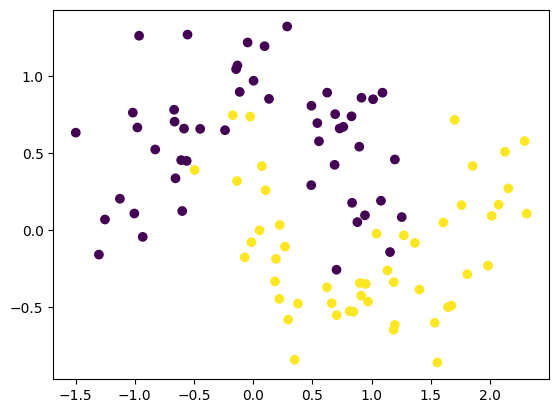

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Without Regularization

In [9]:
model1 = Sequential()

model1.add(Input(shape=(2,)))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=200, validation_split = 0.2,verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.6625 - loss: 0.6184 - val_accuracy: 0.9000 - val_loss: 0.3794
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8250 - loss: 0.4395 - val_accuracy: 0.9000 - val_loss: 0.2346
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8500 - loss: 0.4003 - val_accuracy: 0.9000 - val_loss: 0.2374
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8375 - loss: 0.3828 - val_accuracy: 0.9000 - val_loss: 0.2357
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8500 - loss: 0.3568 - val_accuracy: 0.9000 - val_loss: 0.2419
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8500 - loss: 0.3511 - val_accuracy: 0.9000 - val_loss: 0.2386
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8500 - loss: 0.3384 - val_accuracy: 0.9000 - val_loss: 0.2294
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8500 - loss: 0.3305 - val_accuracy: 0.9000 - val_los

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


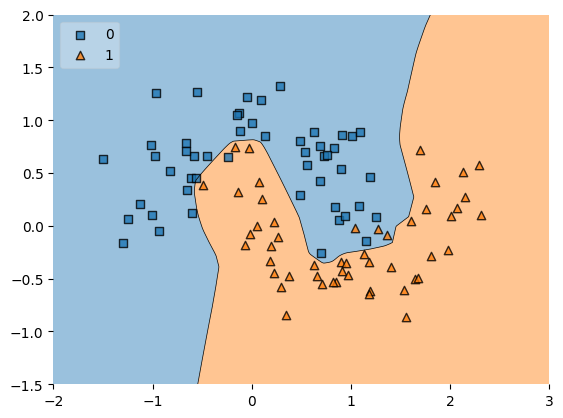

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

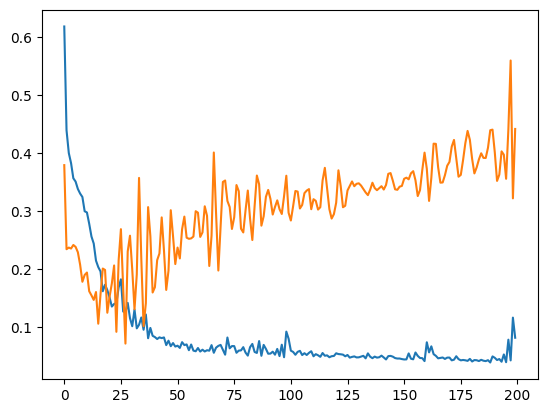

In [13]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

Here, we can clearly see there overfitting is happening after 30 epochs

# With L1 regularization

In [15]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))  #l1 regularization with lembda = 0.001
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=200, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


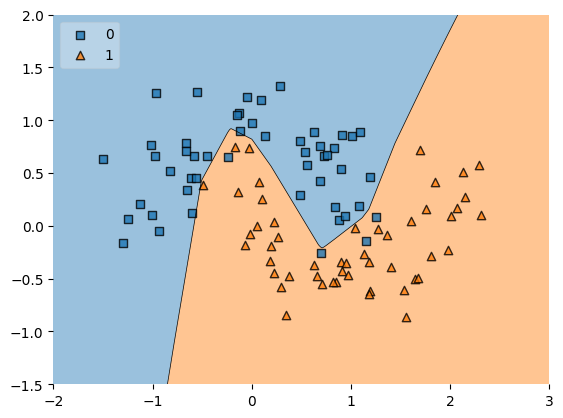

In [17]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

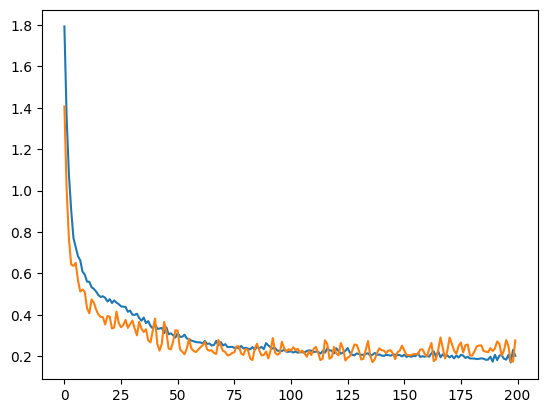

In [19]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

# Comparing weights before and after regularizaztion

In [20]:
# getting the weights

model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

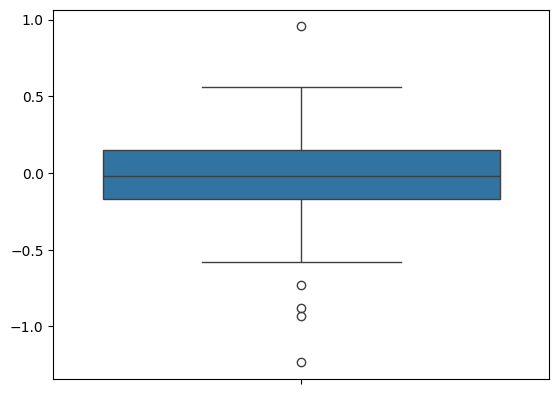

In [23]:
sns.boxplot(model1_weight_layer1)

<Axes: >

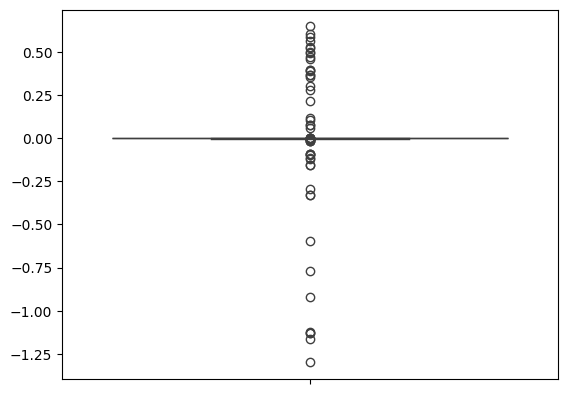

In [24]:
sns.boxplot(model2_weight_layer1)

Most of the weights are centered around 0 due to Regularization

<Axes: ylabel='Density'>

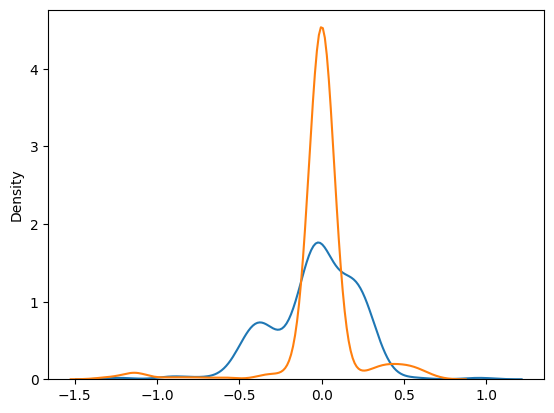

In [27]:
sns.kdeplot(model1_weight_layer1)
sns.kdeplot(model2_weight_layer1)

Orange color represents weights after Regularization (as all weights are near to zero due to regularization)